# Exercício

# Kmeans

**Segmentação de Clientes com K-Means**

**Arquivo Credit Card Customer Data.csv**

**Passos:**

1. Carregue o conjunto de dados de clientes de um arquivo CSV usando a biblioteca pandas.
2. Explore e visualize os dados para entender suas características e distribuição.
3. Selecione as colunas relevantes para a segmentação, como idade, renda anual e gastos anuais.
4. Pré-processe os dados, se necessário (normalização, tratamento de valores ausentes, etc.).
5. Importe a classe `KMeans` da biblioteca scikit-learn.
6. Inicialize o modelo K-Means com um número de clusters desejado.
7. Treine o modelo usando os dados pré-processados.
8. Obtenha os rótulos de cluster para cada cliente no conjunto de dados.
9. Analise e interprete os clusters resultantes.
10. Visualize os clusters para entender como os clientes estão agrupados.
11. Explore diferentes números de clusters para encontrar a melhor segmentação.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

# KMEANS

In [2]:
# Carregar o conjunto de dados
data = pd.read_csv('../../Datasets/Credit Card Customer Data.csv')
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [3]:
data = data.drop(columns=["Sl_No"])
data.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,100000,2,1,1,0
1,38414,50000,3,0,10,9
2,17341,50000,7,1,3,4
3,40496,30000,5,1,1,4
4,47437,100000,6,0,12,3


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer Key         660 non-null    int64
 1   Avg_Credit_Limit     660 non-null    int64
 2   Total_Credit_Cards   660 non-null    int64
 3   Total_visits_bank    660 non-null    int64
 4   Total_visits_online  660 non-null    int64
 5   Total_calls_made     660 non-null    int64
dtypes: int64(6)
memory usage: 31.1 KB


In [5]:
data.describe()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [6]:
data.isna().sum()

Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
# Correlação

corr = data.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Customer Key,1.000000,0.068604,-0.010281,-0.000560,0.022506,0.005968
Avg_Credit_Limit,0.068604,1.000000,0.608860,-0.100312,0.551385,-0.414352
Total_Credit_Cards,-0.010281,0.608860,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,-0.000560,-0.100312,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.022506,0.551385,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,0.005968,-0.414352,-0.651251,-0.506016,0.127299,1.000000


In [9]:
# Criação de uma nova coluna chamada "Pontuação de Interação", pode ajudar a identificar os clientes que estão mais 
#ativamente envolvidos com os serviços do banco.

data['Interaction_Score'] = data['Total_visits_bank'] + data['Total_visits_online'] + data['Total_calls_made']
data

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Interaction_Score
0,87073,100000,2,1,1,0,2
1,38414,50000,3,0,10,9,19
2,17341,50000,7,1,3,4,8
3,40496,30000,5,1,1,4,6
4,47437,100000,6,0,12,3,15
...,...,...,...,...,...,...,...
655,51108,99000,10,1,10,0,11
656,60732,84000,10,1,13,2,16
657,53834,145000,8,1,9,1,11
658,80655,172000,10,1,15,0,16


In [10]:
# Selecionar só 2 colunas para visualização
selected_columns = ['Interaction_Score', 'Avg_Credit_Limit']
df = data[selected_columns]

wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

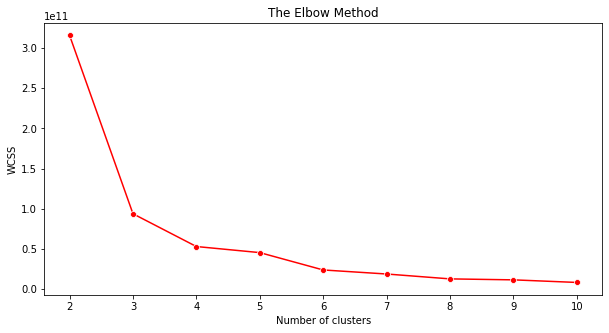

In [11]:
plt.figure(figsize=(10,5))
sns.lineplot(range(2, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

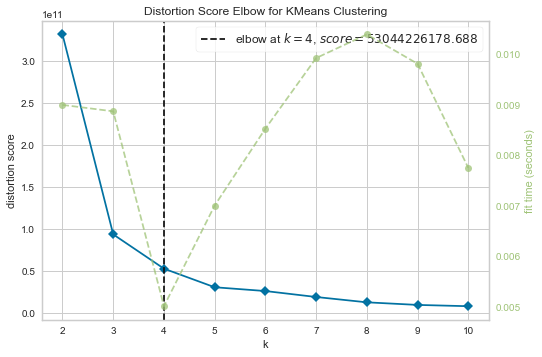

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

model =  KMeans(random_state=15)
visualizer = KElbowVisualizer(model, k=(2,11))

visualizer.fit(df)
visualizer.show()

In [13]:
# Inicializar o modelo K-Means
num_clusters = 4
kmeans = KMeans(n_clusters = num_clusters, init = 'k-means++', random_state = 42)
predictions = kmeans.fit_predict(df)

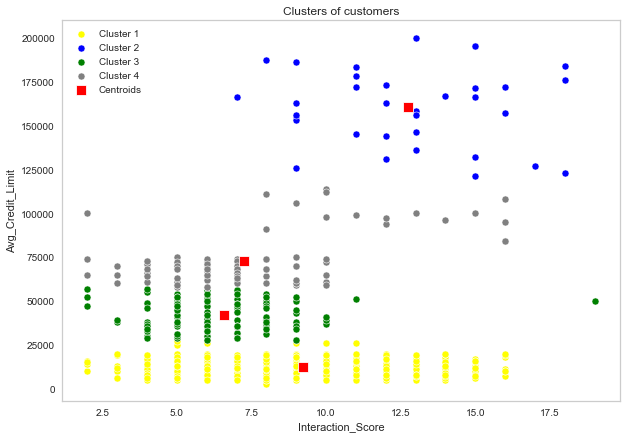

In [14]:
# Visualização dos grupos
plt.figure(figsize=(10,7))

sns.scatterplot(df[predictions == 0]['Interaction_Score'].values, df[predictions == 0]['Avg_Credit_Limit'].values, color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(df[predictions == 1]['Interaction_Score'].values, df[predictions == 1]['Avg_Credit_Limit'].values, color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(df[predictions == 2]['Interaction_Score'].values, df[predictions == 2]['Avg_Credit_Limit'].values, color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(df[predictions == 3]['Interaction_Score'].values, df[predictions == 3]['Avg_Credit_Limit'].values, color = 'grey', label = 'Cluster 4',s=50)

sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red',label = 'Centroids',s=100,marker=',')

plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('Interaction_Score')
plt.ylabel('Avg_Credit_Limit')
plt.legend()
plt.show()

In [15]:
df_copy = df.copy()

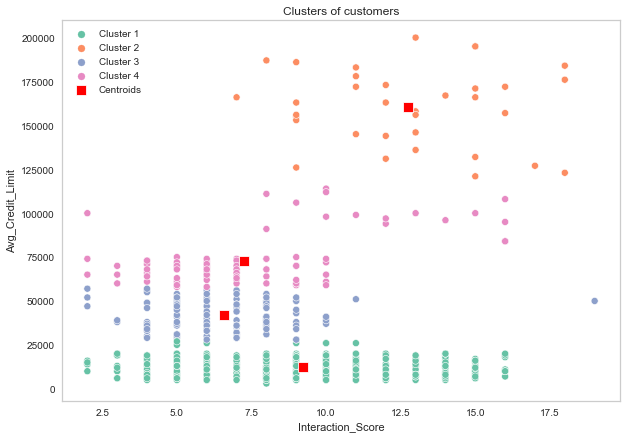

In [16]:
# Visualização dos grupos

plt.figure(figsize=(10,7))

df_copy['predictions'] = predictions
df_copy['label_predictions'] = pd.cut(df_copy['predictions'], bins=4, labels=[f'Cluster {i}' for i in range(1, 5)])

sns.scatterplot(df_copy['Interaction_Score'].values, df_copy['Avg_Credit_Limit'].values, hue = df_copy['label_predictions'].values,palette='Set2',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red',label = 'Centroids',s=100,marker=',')

plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('Interaction_Score')
plt.ylabel('Avg_Credit_Limit')
plt.legend()
plt.show()